# Delivery 4 Part II

Now it is time to analyze the new subsets! 

First we will read in the subsets that were made in part 1.

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = '../Datasets/'
cols = ['County', 'Count', 'Influenza_A', 'Influenza_B',
       'Influenza_Unspecified', 'FIPS', 'Population', 'Prevalence_Rate']
flu_09 = pd.read_csv(path+"flu_09.csv", usecols=cols)
flu_10 = pd.read_csv(path+"flu_10.csv", usecols=cols)
flu_11 = pd.read_csv(path+"flu_11.csv", usecols=cols)
flu_12 = pd.read_csv(path+"flu_12.csv", usecols=cols)
flu_13 = pd.read_csv(path+"flu_13.csv", usecols=cols)
#flu_14 = pd.read_csv(path+"flu_14.csv", usecols=cols) didn't use this set due to missing counties
flu_15 = pd.read_csv(path+"flu_15.csv", usecols=cols)
flu_16 = pd.read_csv(path+"flu_16.csv", usecols=cols)
flu_17 = pd.read_csv(path+"flu_17.csv", usecols=cols)
flu_18 = pd.read_csv(path+"flu_18.csv", usecols=cols)

In [3]:
# check out the datasets a little bit... randomly seeing if things look right
# and there are no missing values (just examples below)

In [4]:
flu_09.head()

,County,Count,Influenza_A,Influenza_B,Influenza_Unspecified,FIPS,Population,Prevalence_Rate
0,ALBANY,333,331,2,0,36001.0,304733,10.927599
1,ALLEGANY,222,222,0,0,36003.0,48969,45.334804
2,BRONX,1116,1063,33,20,36005.0,1376261,8.108927
3,BROOME,642,626,2,14,36007.0,200935,31.950631
4,CATTARAUGUS,172,171,1,0,36009.0,80491,21.368849


In [5]:
flu_18.isna().sum()

County                   0
Count                    0
Influenza_A              0
Influenza_B              0
Influenza_Unspecified    0
FIPS                     0
Population               0
Prevalence_Rate          0
dtype: int64

### Analysis of the 2009-2010 season

In [6]:
import matplotlib.pyplot as plt

In [7]:
label = flu_09['County']
type_A = flu_09['Influenza_A']

In [8]:
# Code based on (but modified to my dataset/preferences for fontsize, etc)
# https://medium.com/python-pandemonium/data-visualization-in-python-bar-graph-in-matplotlib-f1738602e9c4

def plot_bar_x():
    index = np.arange(len(label))
    plt.figure(figsize=(20,10))
    plt.bar(index, type_A)
    plt.xlabel('County', fontsize=15)
    plt.ylabel('Number of Influenza Type A Cases', fontsize=15)
    plt.xticks(index, label, fontsize=11, rotation=70)
    plt.title('Number of Influenza Type A Cases vs. County: 2009-2010 Season', fontsize=20)
    plt.show()
    

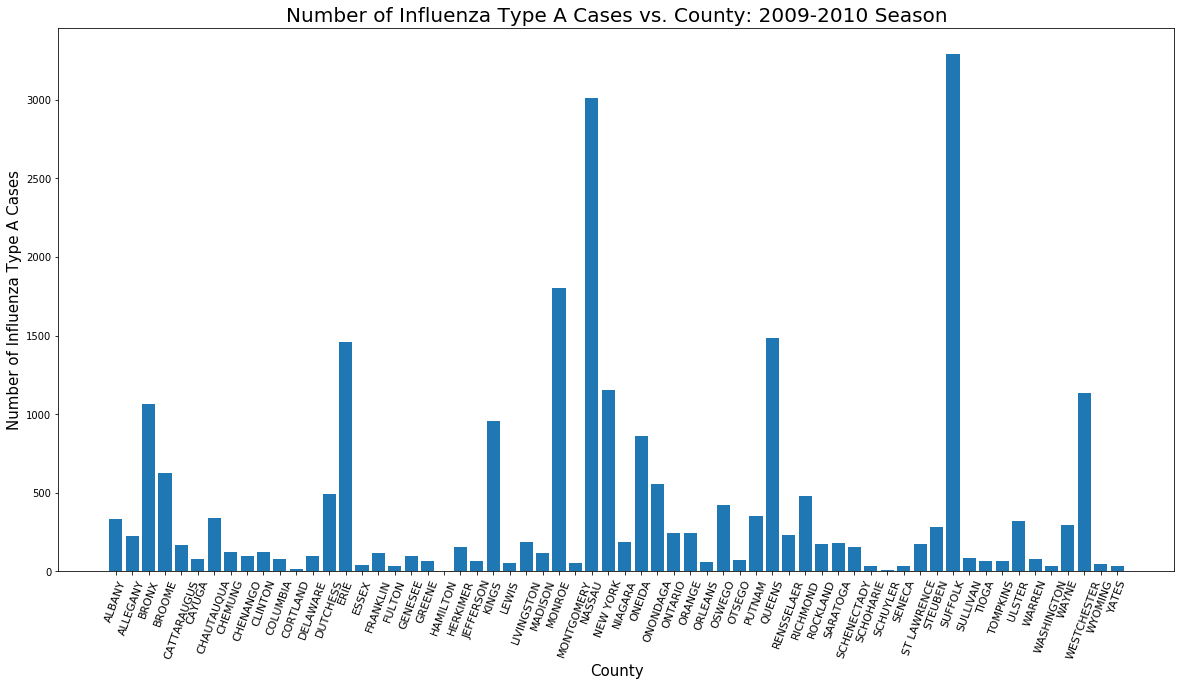

In [9]:
plot_bar_x()

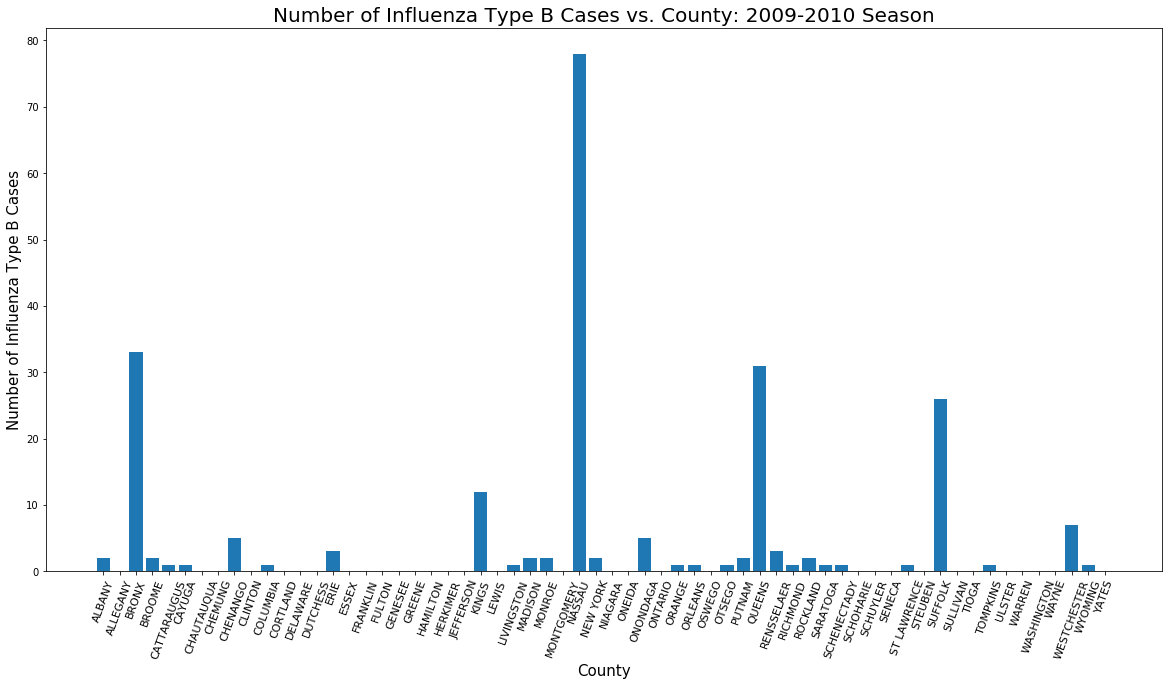

In [10]:
label = flu_09['County']
type_B = flu_09['Influenza_B']

def plot_bar_x():
    index = np.arange(len(label))
    plt.figure(figsize=(20,10))
    plt.bar(index, type_B)
    plt.xlabel('County', fontsize=15)
    plt.ylabel('Number of Influenza Type B Cases', fontsize=15)
    plt.xticks(index, label, fontsize=11, rotation=70)
    plt.title('Number of Influenza Type B Cases vs. County: 2009-2010 Season', fontsize=20)
    plt.show()
    
plot_bar_x()

#### Questions:
* Does the 2009-2010 season follow the 75% A and 25% B trend?


Let's first try to make a stacked bar chart... and look at other visualizations - then I will calculate the percentage to answer the question above. What will be interesting is calculating the percentage across all seasons and seeing if on average, they follow a consistent trend!


In [11]:
# based on python graph gallery example on toy dataset
# https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/

# Add height of type A and B bars
bars = np.add(type_A, type_B).tolist()

def plot_stacked_bar_x():
    index = np.arange(len(label))
    plt.figure(figsize=(20,10))
    plt.bar(index, type_A, color='#557f2d')
    plt.bar(index, type_B, color = '#2d7f5e')
    plt.xlabel('County', fontsize=15)
    plt.ylabel('Number of Influenza Type A and B Cases', fontsize=15)
    plt.xticks(index, label, fontsize=11, rotation=70)
    plt.title('Number of Influenza Type A and B Cases for Each County: 2009-2010 Season', fontsize=20)
    plt.show()


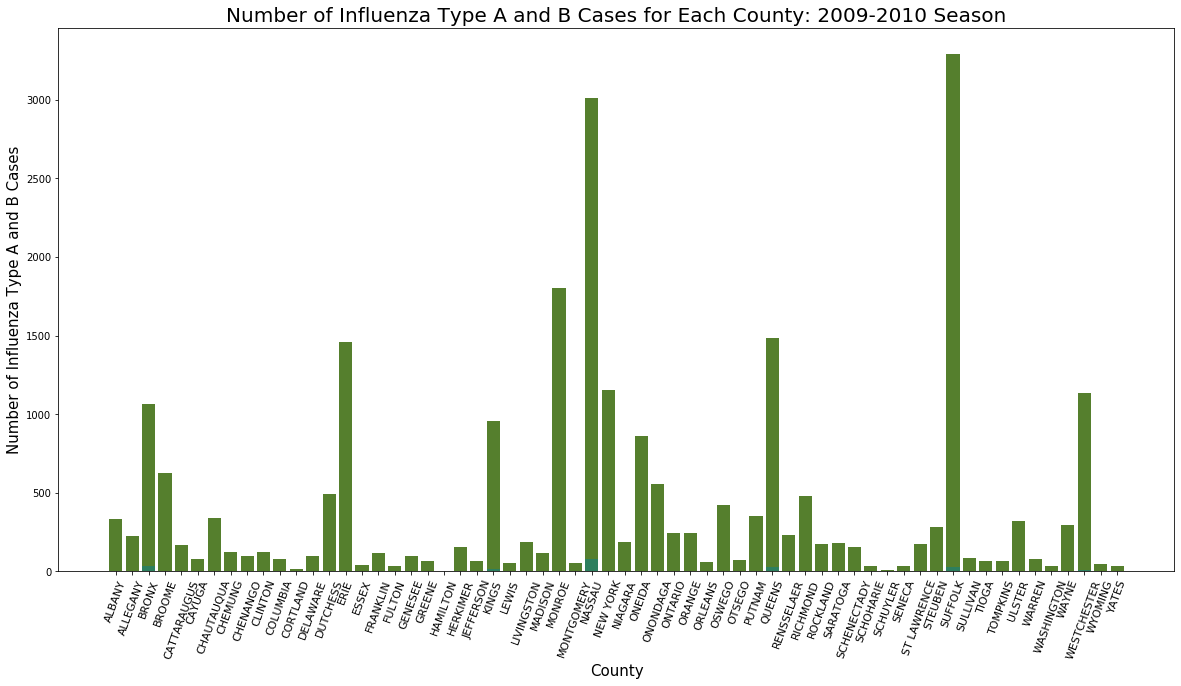

In [12]:
plot_stacked_bar_x()

The type A (green) outnumbers type B (blue) influenza in the 2009-2010 season... let's look at their percentages.

### Percentages of Type A and Type B influenza for each county in 2009-2010 season

In [13]:
# maybe try to define a function so this is easier!
def calc_percentage_A(df):
    percentage_A=[]
    total = df['Count']
    
    for index, row in df.iterrows():
        percentage_A.append((row.Influenza_A/row.Count)*100)
    return percentage_A

def calc_percentage_B(df):
    percentage_B=[]
    total = df['Count']
    
    for index, row in df.iterrows():
        percentage_B.append((row.Influenza_B/row.Count)*100)
    return percentage_B

In [14]:
percentage_A_09 = calc_percentage_A(flu_09)
#percentage_A_09
percentage_B_09 = calc_percentage_B(flu_09)
#percentage_B_09

In [15]:
percentage_09 = flu_09['County']
type(percentage_09)

pandas.core.series.Series

In [16]:
percentage_09 = percentage_09.to_frame()
#percentage_09

In [17]:
percentage_09['A'] = percentage_A_09
percentage_09['B'] = percentage_B_09
percentage_09

,County,A,B
0,ALBANY,99.399399,0.600601
1,ALLEGANY,100.000000,0.000000
2,BRONX,95.250896,2.956989
3,BROOME,97.507788,0.311526
4,CATTARAUGUS,99.418605,0.581395
...,...,...,...
57,WASHINGTON,100.000000,0.000000
58,WAYNE,100.000000,0.000000
59,WESTCHESTER,98.781549,0.609225
60,WYOMING,97.959184,2.040816


What about for NYS as a whole this season? As well as the average...

In [18]:
import statistics

In [19]:
A_09_avg_percent = statistics.mean(percentage_09['A'])
print(A_09_avg_percent)
B_09_avg_percent = statistics.mean(percentage_09['B'])
print(B_09_avg_percent)


98.75360060887677
0.5508583145304736


In [20]:
percentage_09.describe()

,A,B
count,62.000000,62.000000
mean,98.753601,0.550858
std,1.687320,0.890167
min,92.741935,0.000000
25%,98.343496,0.000000
50%,99.409002,0.000000
75%,100.000000,0.745047
max,100.000000,4.761905


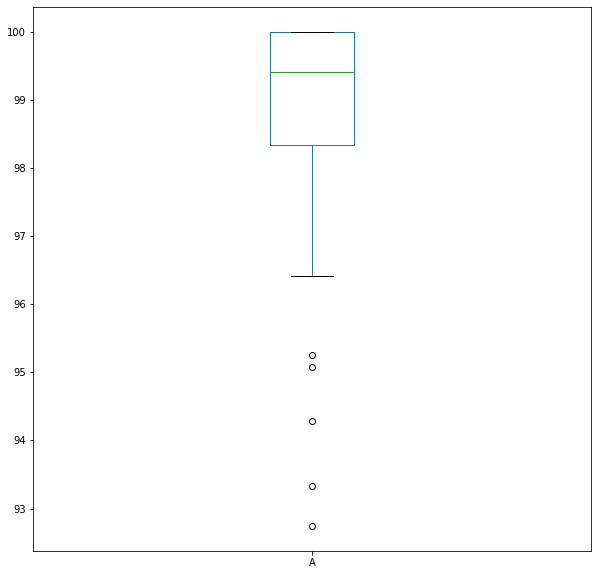

In [21]:
# Based off pydata.org documentation
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

# I set grid to False to make the image easier to see, but it can be helpful
# to have the grid set to True if you want to see the line up. 
percentage_09.boxplot(column = 'A', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6CFD1DD8>]],
      dtype=object)

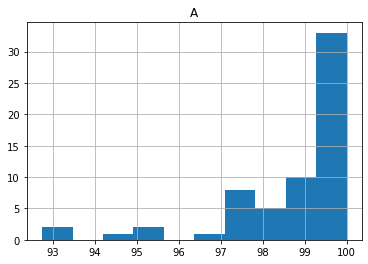

In [22]:
percentage_09.hist(column = 'A')

Like the box plot shows, we are left skewed... where, for most counties, 100% of the confirmed cases are influenza type A... with some "outliers" that are below 97% type A.

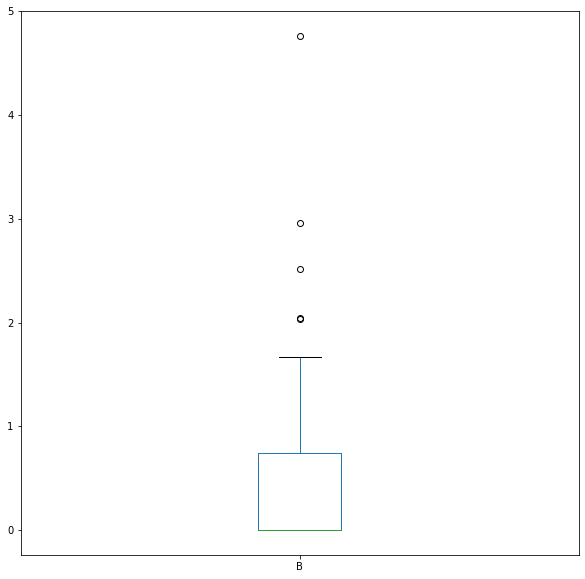

In [23]:
percentage_09.boxplot(column = 'B', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6D0DD438>]],
      dtype=object)

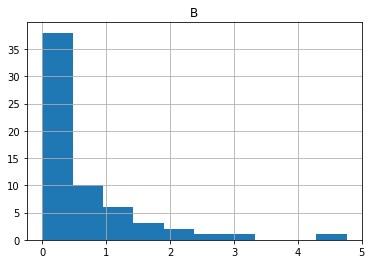

In [24]:
percentage_09.hist(column = 'B')

## 2010-2011 Season
Here I am going to try to make my code more robust to make my life easier for the remaining seasons. 


In [25]:
def plot_bar_x(df, label, TYPE, t, season):
    index = np.arange(len(label))
    plt.figure(figsize=(20,10))
    plt.bar(index, TYPE) # Have to do all caps because 'type' is a function!
    plt.xlabel('County', fontsize=15)
    plt.ylabel('Number of Influenza Type'+' '+t+' '+'Cases', fontsize=15)
    plt.xticks(index, label, fontsize=11, rotation=70)
    plt.title('Number of Influenza Type'+' '+t+' '+'Cases vs. County:'+' '+season+' '+'Season', fontsize=20)
    plt.show()

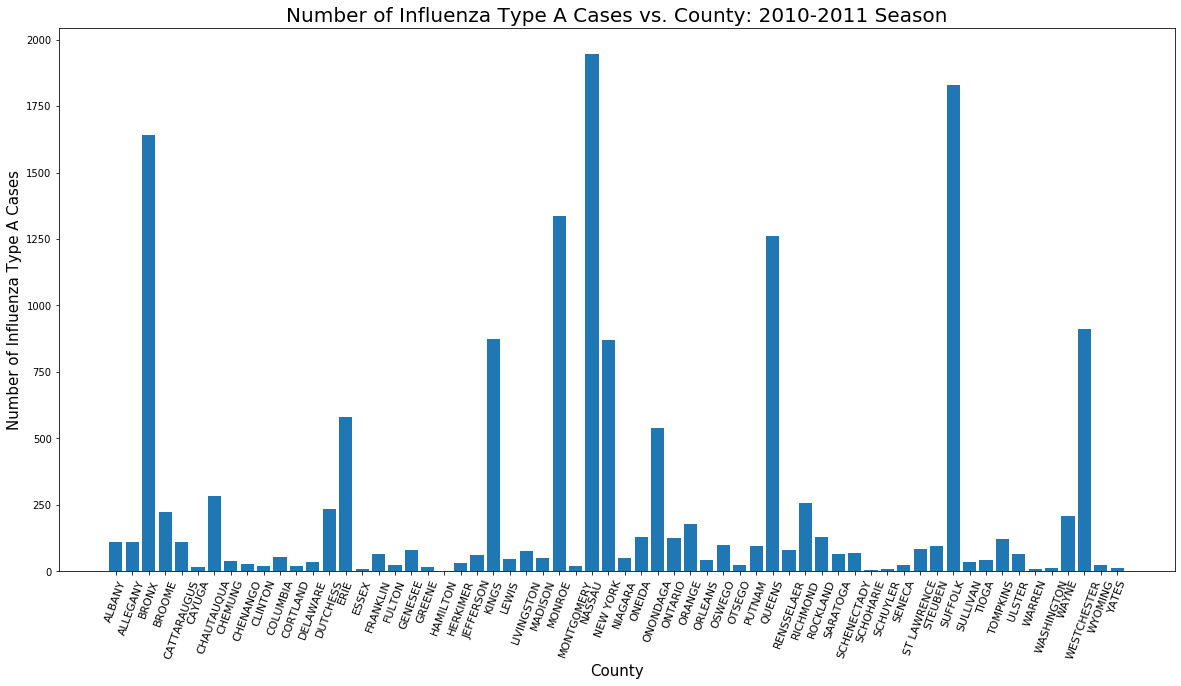

In [26]:
# can either do:
label = flu_10['County']
TYPE = flu_10['Influenza_A']
t = "A" # t for type
season = "2010-2011"

plot_bar_x(flu_10, label, TYPE, t, season)

In [27]:
# or can type in values like this!
#plot_bar_x(flu_10, flu_10['County'], flu_10['Influenza_A'], "A", "2010-2011")

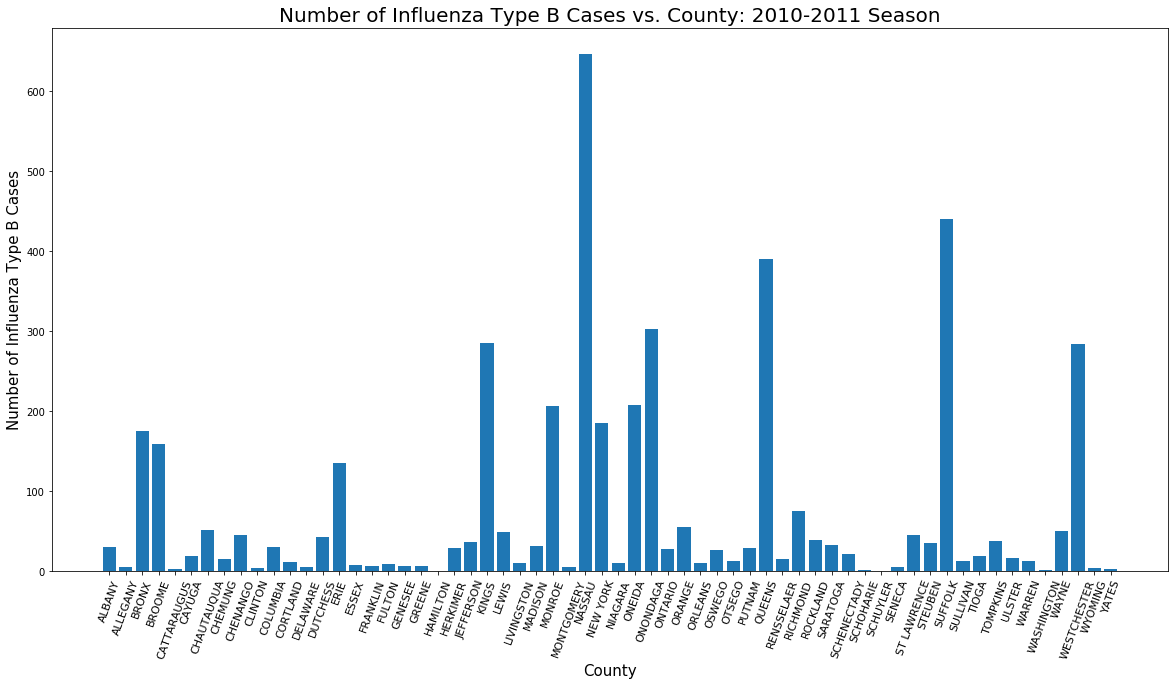

In [28]:
# now for type B we just make the following changes!
TYPE = flu_10['Influenza_B']
t = "B" # t for type


plot_bar_x(flu_10, label, TYPE, t, season)

In [29]:

# Add height of type A and B bars
bars = np.add(type_A, type_B).tolist()

def plot_stacked_bar_x():
    index = np.arange(len(label))
    plt.figure(figsize=(20,10))
    plt.bar(index, type_A, color='#557f2d')
    plt.bar(index, type_B, color = '#2d7f5e')
    plt.xlabel('County', fontsize=15)
    plt.ylabel('Number of Influenza Type A and B Cases', fontsize=15)
    plt.xticks(index, label, fontsize=11, rotation=70)
    plt.title('Number of Influenza Type A and B Cases for Each County: 2009-2010 Season', fontsize=20)
    plt.show()

In [30]:
# harder to make more robust, but let's try

def plot_stacked_bar_x(df, label, A, B, season):
    index = np.arange(len(label))
    plt.figure(figsize=(20,10))
    plt.bar(index, A, color='#557f2d')
    plt.bar(index, B, color = '#2d7f5e')
    plt.xlabel('County',fontsize=15)
    plt.ylabel('Number of Influenza Type A and B Cases', fontsize=15)
    plt.xticks(index, label, fontsize=11, rotation=70)
    plt.title('Number of Influenza Type A and B Cases for Each County:'+' '+season+' '+'Season', fontsize=20)
    plt.show()

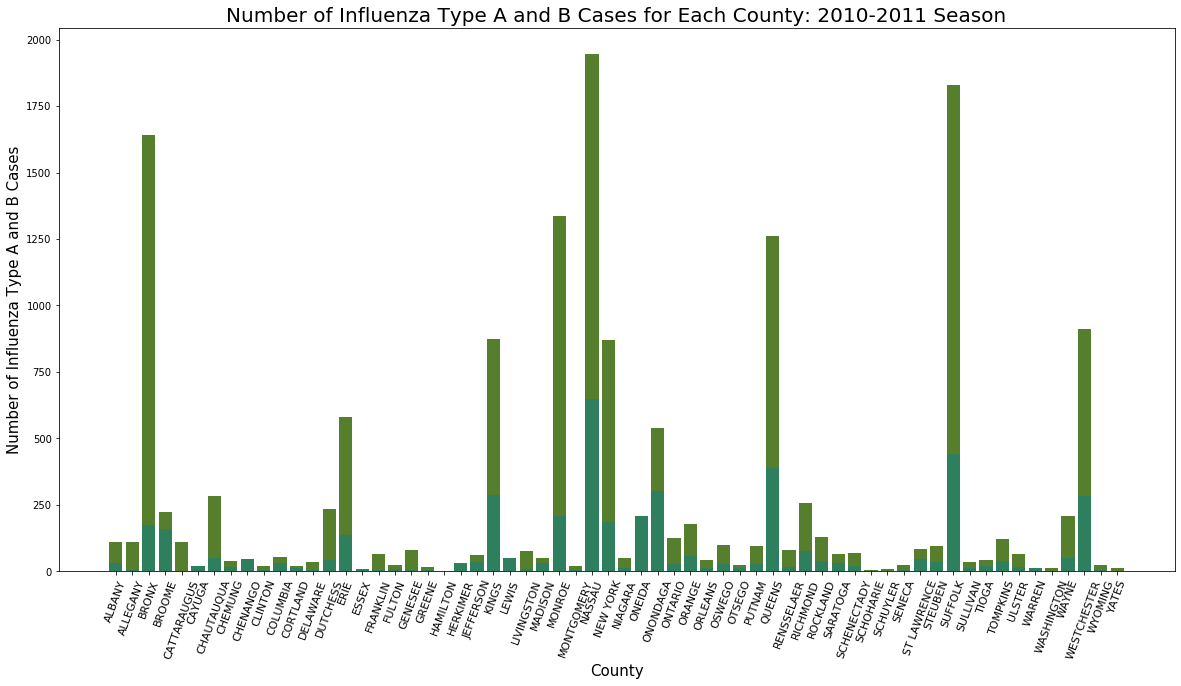

In [31]:
A = flu_10['Influenza_A']
B = flu_10['Influenza_B']
season = "2010-2011"

plot_stacked_bar_x(flu_10, label, A, B, season)

Cool! This should make things easier when it comes to graphing remaining counties.

### Percentage of Type A vs. Type B Influenza Cases for Each County: 2010-2011 Season

Will be using the `calc_percentage_A` and `calc_percentage_B` functions... I tried ot make it more robust but had some troubles. This definition is simple enough.

For the sake of time - I won't be doing observations for each subset. The subset I spend more time on is the 2017-2018 season. However, I hope to spend more time on all of the subsets in the future. I will have brief comments - but the next part of this delivery has way more in-depth comments and observations. 

### 2010-2011 Season

In [32]:
# maybe make the remaining more robust. First will do as we did before
percent_A = calc_percentage_A(flu_10)
percent_B = calc_percentage_B(flu_10)

percentage_10 = flu_10['County'].to_frame()
type(percentage_10)

percentage_10['A'] = percent_A
percentage_10['B'] = percent_B

percentage_10

,County,A,B
0,ALBANY,77.083333,20.833333
1,ALLEGANY,94.017094,5.128205
2,BRONX,89.726776,9.562842
3,BROOME,57.289003,40.664962
4,CATTARAUGUS,97.391304,2.608696
...,...,...,...
57,WASHINGTON,84.615385,15.384615
58,WAYNE,80.769231,19.230769
59,WESTCHESTER,76.000000,23.666667
60,WYOMING,86.206897,13.793103


In [33]:
percentage_10.describe()

,A,B
count,62.000000,62.000000
mean,72.388393,26.131388
std,16.350363,13.799285
min,0.000000,2.608696
25%,64.411512,16.899055
50%,76.135593,23.398230
75%,81.370192,34.251423
max,97.391304,61.538462


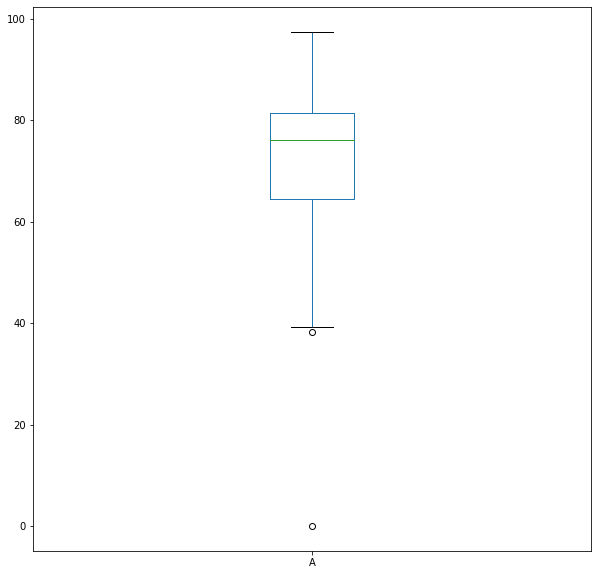

In [34]:
percentage_10.boxplot(column = 'A', grid=False, figsize=(10,10))

There appears to be two potential outliers... with one being close to a 0% (or at 0%) for the percentage of confirmed influenza A (for a certain county). This is interesting. Let's see what county this is!

In [35]:
percentage_10.loc[(percentage_10["A"]==0)]

,County,A,B
20,HAMILTON,0.0,50.0


Now we know this is Hamilton County with 0% of influenza type A... and 50% B. THis looks more like an issue with the data set than anything else. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6C8D1240>]],
      dtype=object)

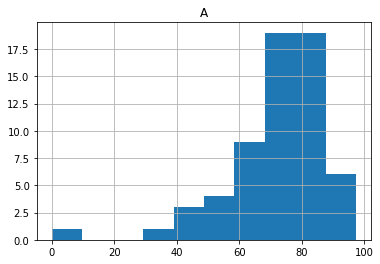

In [36]:
percentage_10.hist(column = 'A')

Observations:
This is starting to have a slightly more normal looking distribution (still left skewed - likely do to the issue with Hamilton County percentages).

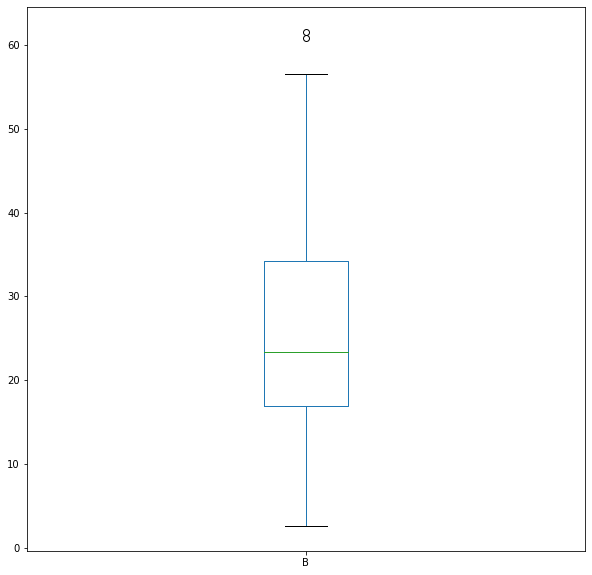

In [37]:
percentage_10.boxplot(column = 'B', grid=False, figsize=(10,10))


B has two potential outliers around the 60% mark of influenza type B. Let's see what these counties are.

In [38]:
percentage_10.loc[(percentage_10["B"]>60)]

,County,A,B
8,CHENANGO,39.189189,60.810811
32,ONEIDA,38.165680,61.538462


We have Oneida county (which has higher prevalence rates as is) with a higher rate of influenza B than A for this season! Surprisingly, this 2010-2011 season appears to have a higher % of influenza B than many other seasons. This comment is not confirmed though - more analysis would be required. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6D1D7C50>]],
      dtype=object)

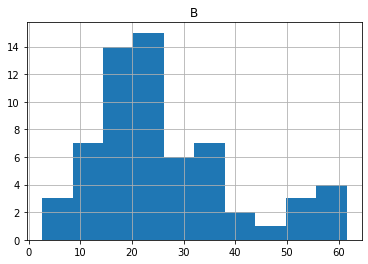

In [39]:
percentage_10.hist(column = 'B')

## 2011-2012 Season

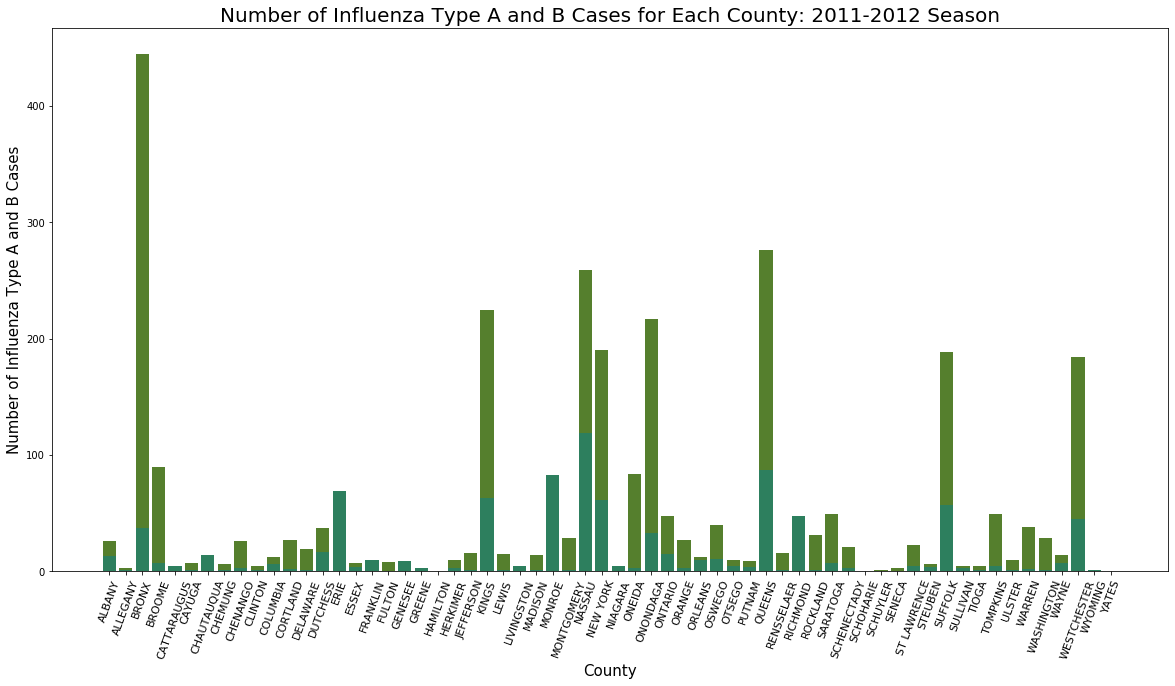

In [40]:
label = flu_11['County']
A = flu_11['Influenza_A']
B = flu_11['Influenza_B']
season = "2011-2012"

plot_stacked_bar_x(flu_11, label, A, B, season)

In [41]:
flu_11.tail()

,County,Count,Influenza_A,Influenza_B,Influenza_Unspecified,FIPS,Population,Prevalence_Rate
57,WASHINGTON,30,29,1,0,36115.0,63091,4.755036
58,WAYNE,21,14,7,0,36117.0,93256,2.251866
59,WESTCHESTER,229,184,45,0,36119.0,956262,2.394741
60,WYOMING,1,0,1,0,36121.0,41849,0.238954
61,YATES,0,0,0,0,36123.0,25454,0.000000


This subset has a count of zero... meaning my `calc_percentage` functions won't work (can't divide by zero!)... how do we fix this? 

Thanks to google, I came across this issue and a possible solution from stackoverflow (https://stackoverflow.com/questions/29836964/error-python-zerodivisionerror-division-by-zero) - and applied the try/except loop. It worked! So now we have a new `calc_percentage_A` and `calc_percentage_B` function. 



In [42]:
def calc_percentage_A(df):
    percentage_A=[]
    
    for index, row in df.iterrows():
        try:
            percentage_A.append((row.Influenza_A/row.Count)*100)
        except ZeroDivisionError:
            percentage_A.append(0)
    return percentage_A
            
def calc_percentage_B(df):
    percentage_B=[]
    
    for index, row in df.iterrows():
        try:
            percentage_B.append((row.Influenza_B/row.Count)*100)
        except ZeroDivisionError:
            percentage_B.append(0)
    return percentage_B        

In [43]:
percent_A = calc_percentage_A(flu_11)
percent_B = calc_percentage_B(flu_11)

percent_11 = flu_11['County'].to_frame() # changed from percentage_11 to percent_11... shorter
type(percent_11)

percent_11['A'] = percent_A
percent_11['B'] = percent_B

percent_11

,County,A,B
0,ALBANY,66.666667,33.333333
1,ALLEGANY,75.000000,25.000000
2,BRONX,90.631365,7.535642
3,BROOME,91.836735,7.142857
4,CATTARAUGUS,44.444444,55.555556
...,...,...,...
57,WASHINGTON,96.666667,3.333333
58,WAYNE,66.666667,33.333333
59,WESTCHESTER,80.349345,19.650655
60,WYOMING,0.000000,100.000000


In [44]:
percent_11.describe()

,A,B
count,62.000000,62.000000
mean,70.088462,24.502697
std,27.598867,23.098511
min,0.000000,0.000000
25%,60.625000,6.724138
50%,77.388874,18.753899
75%,90.713397,33.333333
max,100.000000,100.000000


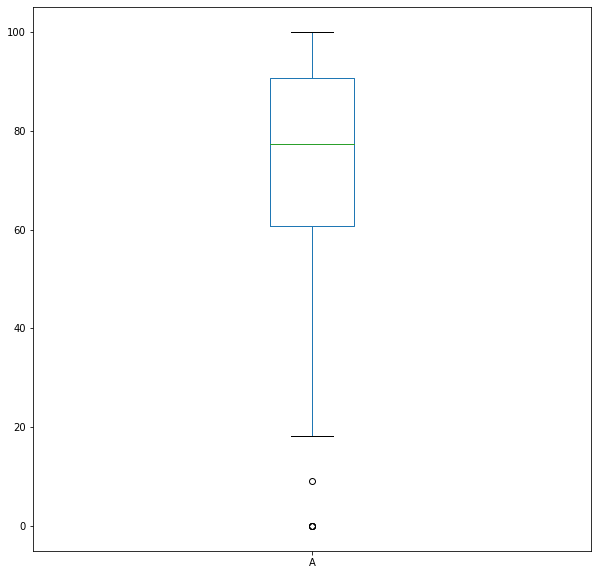

In [45]:
percent_11.boxplot(column = 'A', grid=False, figsize=(10,10))

In [46]:
# Look at the outliers:
percent_11.loc[(percent_11["A"]==0)]

,County,A,B
20,HAMILTON,0.0,0.0
46,SCHOHARIE,0.0,0.0
60,WYOMING,0.0,100.0
61,YATES,0.0,0.0


As you can see - we have some issues with the percentages. Part of that could be due to excluding the "Unspecified" Influenza diagnoses. Part 4 of this delivery does set up the percentages properly - but it is important to note that if you continue to do more work on these different seasons - the methods provided here may not be the best way to go about it. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6E5B2780>]],
      dtype=object)

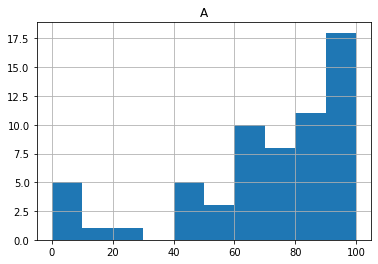

In [47]:
percent_11.hist(column = 'A')

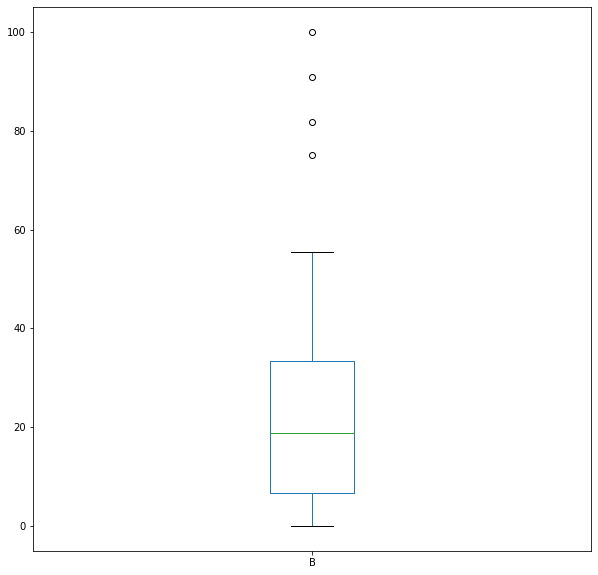

In [48]:
percent_11.boxplot(column = 'B', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6C8BA978>]],
      dtype=object)

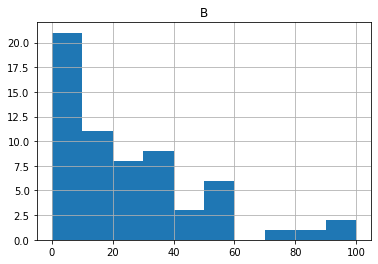

In [49]:
percent_11.hist(column = 'B')

## 2012-2013 Season

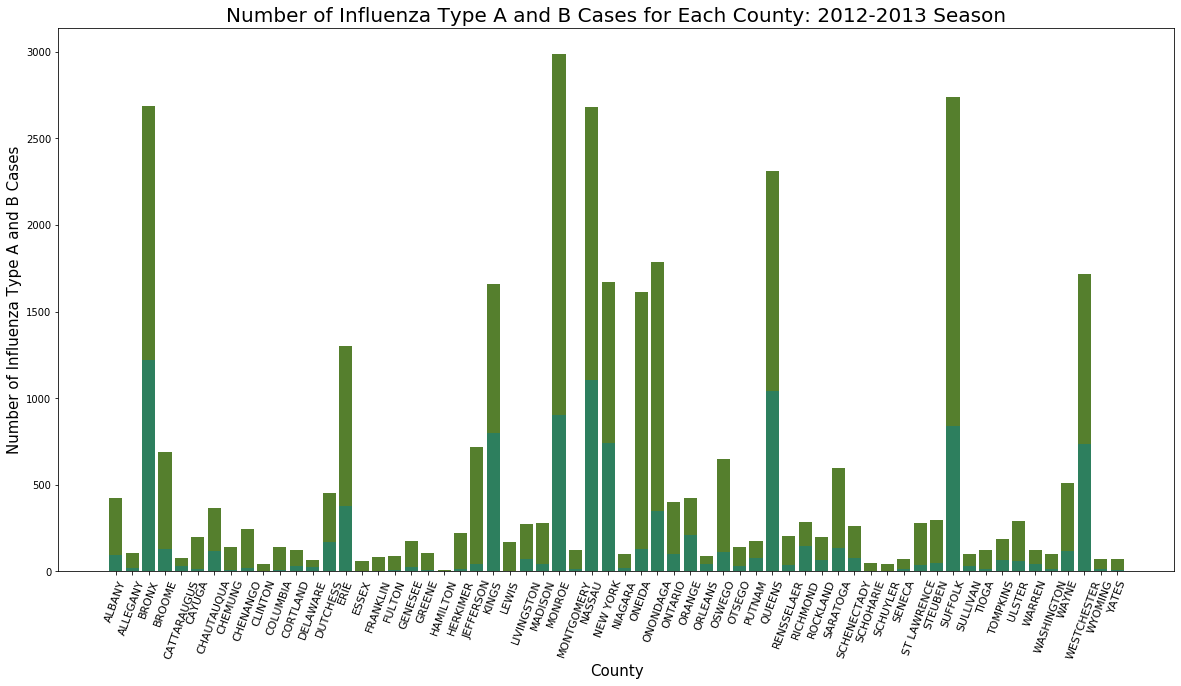

In [50]:
label = flu_12['County']
A = flu_12['Influenza_A']
B = flu_12['Influenza_B']
season = "2012-2013"

plot_stacked_bar_x(flu_12, label, A, B, season)

#### Percentages of Influenza A and B from the 2012-2013 Season

In [51]:
percent_A = calc_percentage_A(flu_12)
percent_B = calc_percentage_B(flu_12)

percent_12 = flu_12['County'].to_frame() # changed from percentage_11 to percent_11... shorter
type(percent_12)

percent_12['A'] = percent_A
percent_12['B'] = percent_B

percent_12

,County,A,B
0,ALBANY,81.765835,17.850288
1,ALLEGANY,85.365854,14.634146
2,BRONX,67.931209,30.854831
3,BROOME,83.819951,15.815085
4,CATTARAUGUS,73.148148,26.851852
...,...,...,...
57,WASHINGTON,86.842105,13.157895
58,WAYNE,81.210191,18.630573
59,WESTCHESTER,69.825132,29.930866
60,WYOMING,80.232558,18.604651


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6E5C2208>]],
      dtype=object)

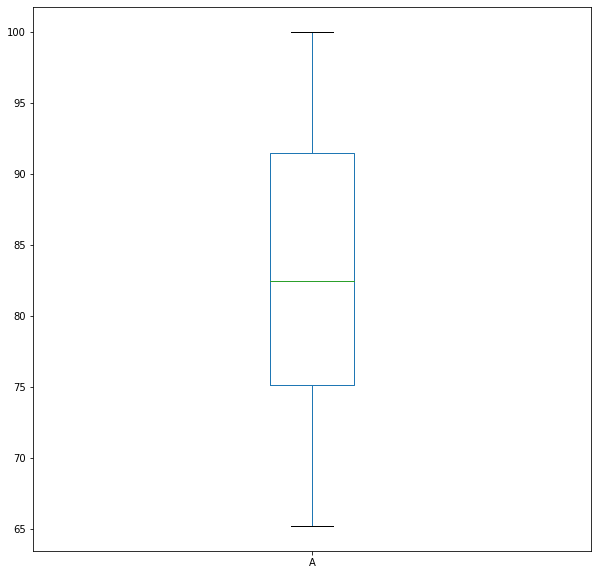

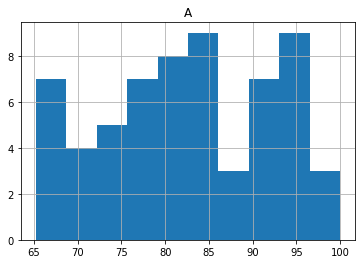

In [52]:
percent_12.boxplot(column = 'A', grid=False, figsize=(10,10))
percent_12.hist(column = 'A')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6D2F1C50>]],
      dtype=object)

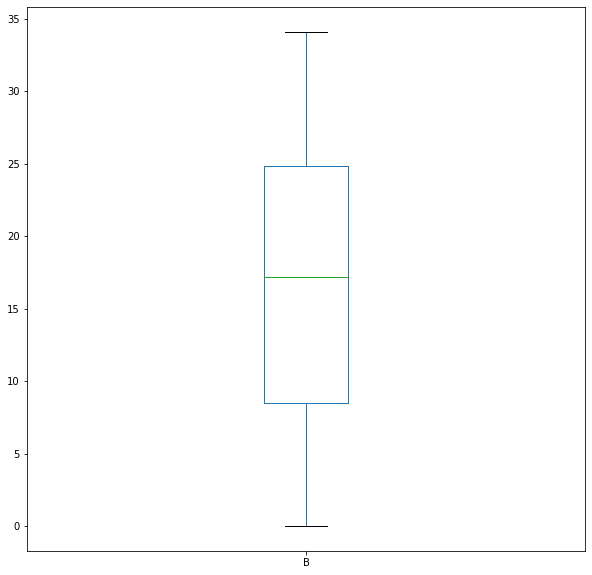

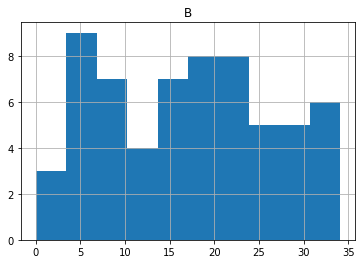

In [53]:
percent_12.boxplot(column = 'B', grid=False, figsize=(10,10))
percent_12.hist(column = 'B')

## 2013-2014 Season

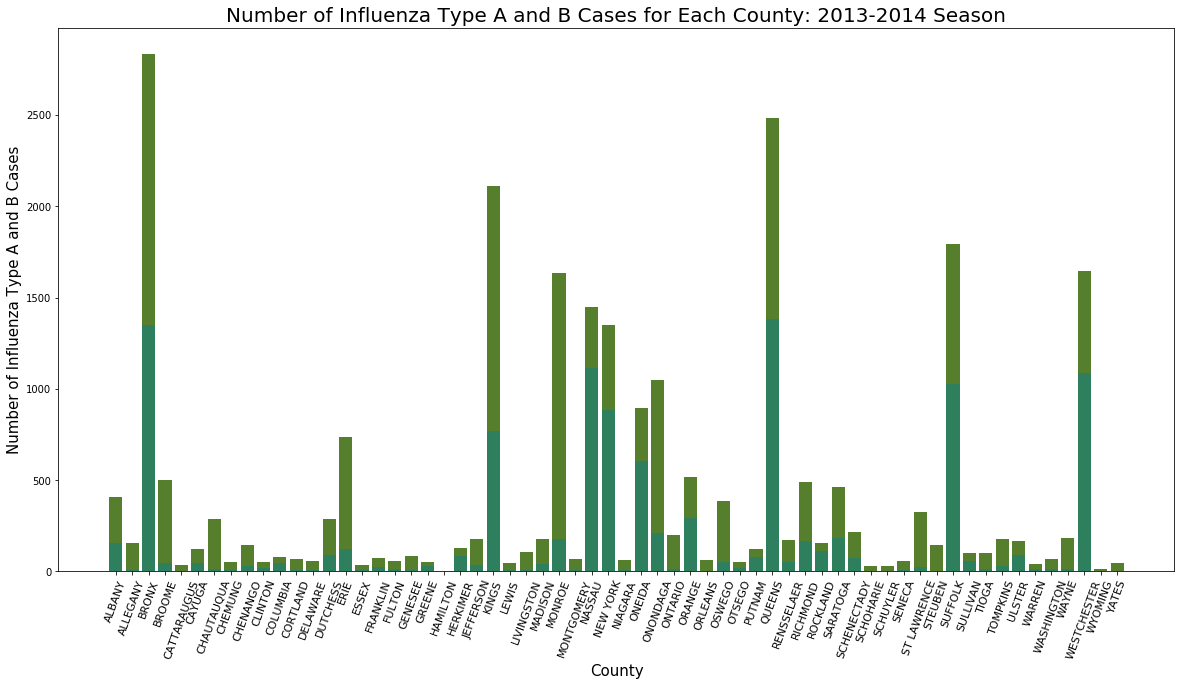

In [54]:
label = flu_13['County']
A = flu_13['Influenza_A']
B = flu_13['Influenza_B']
season = "2013-2014"

plot_stacked_bar_x(flu_13, label, A, B, season)

#### Percentages of Influenza A and B from the 2013-2014 Season

In [55]:
percent_A = calc_percentage_A(flu_13)
percent_B = calc_percentage_B(flu_13)

percent_13 = flu_13['County'].to_frame()
type(percent_13)

percent_13['A'] = percent_A
percent_13['B'] = percent_B

percent_13

,County,A,B
0,ALBANY,72.134039,27.865961
1,ALLEGANY,96.875000,3.125000
2,BRONX,66.855257,31.753890
3,BROOME,91.621129,8.378871
4,CATTARAUGUS,94.285714,5.714286
...,...,...,...
57,WASHINGTON,85.185185,14.814815
58,WAYNE,92.385787,7.614213
59,WESTCHESTER,60.116874,39.700511
60,WYOMING,92.857143,7.142857


In [56]:
percent_13.describe()

,A,B
count,62.000000,62.000000
mean,79.140681,20.514992
std,13.882776,13.697408
min,33.333333,0.680272
25%,67.932854,9.656197
50%,83.678647,16.110549
75%,90.343803,30.908976
max,97.959184,66.666667


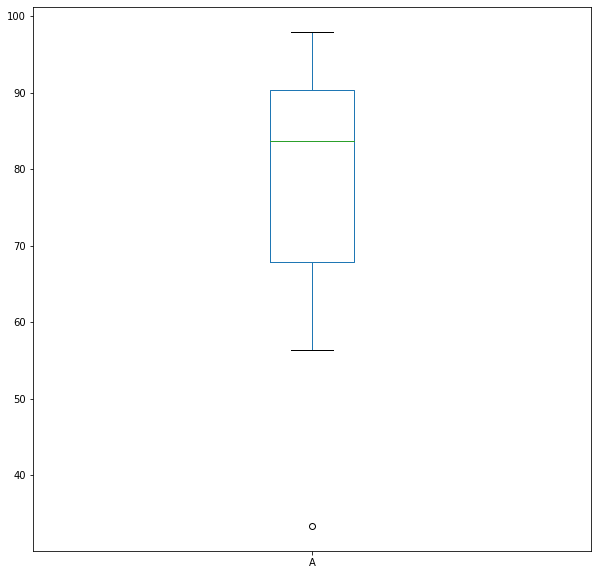

In [57]:
percent_13.boxplot(column = 'A', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6CAC9BA8>]],
      dtype=object)

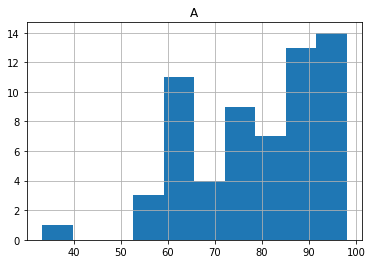

In [58]:
percent_13.hist(column = 'A')

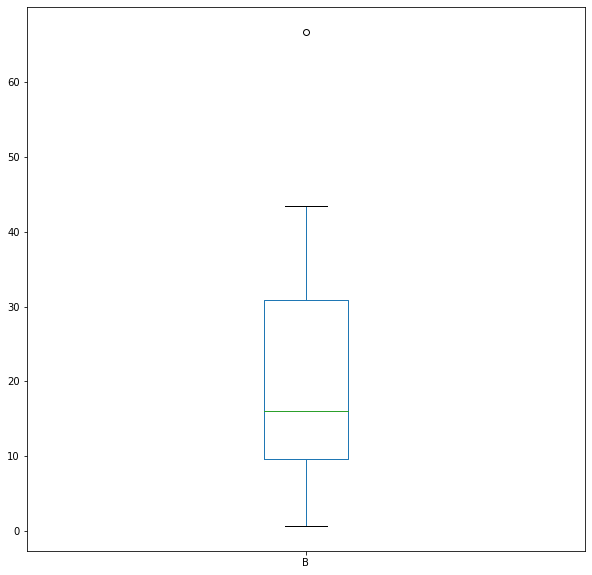

In [59]:
percent_13.boxplot(column = 'B', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6CF358D0>]],
      dtype=object)

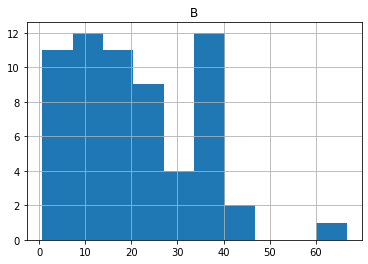

In [60]:
percent_13.hist(column = 'B')

o

## 2015-2016 Season

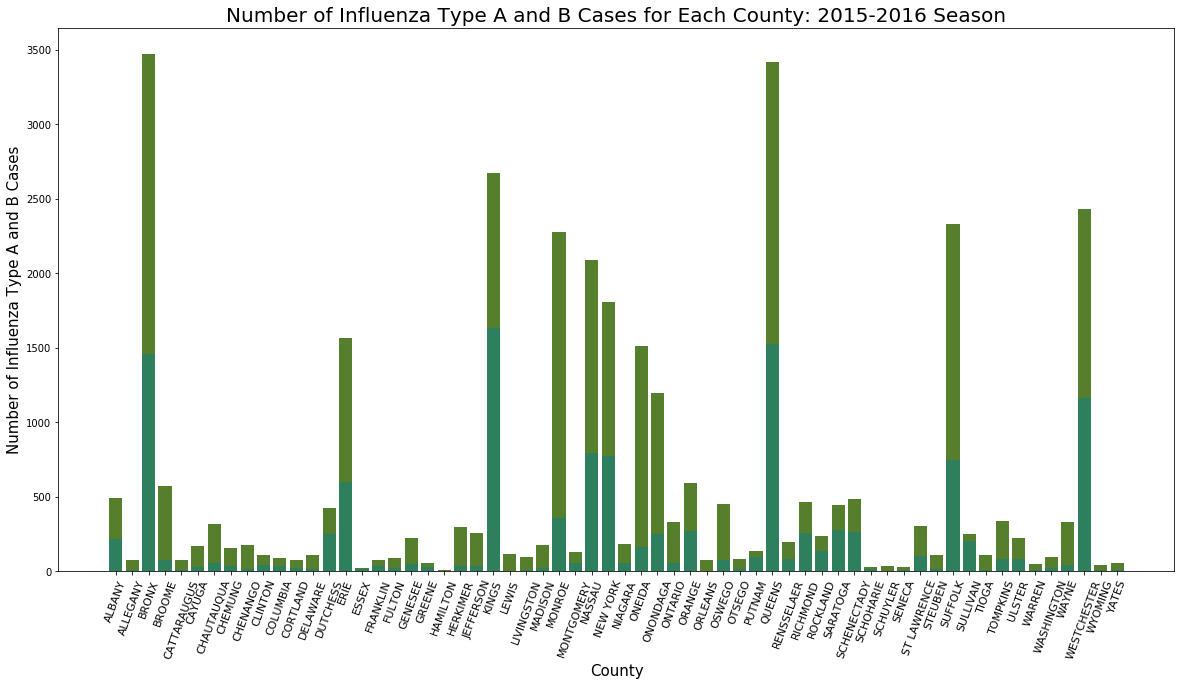

In [61]:
label = flu_15['County']
A = flu_15['Influenza_A']
B = flu_15['Influenza_B']
season = "2015-2016"

plot_stacked_bar_x(flu_15, label, A, B, season)

#### Percentages of Influenza A and B from the 2015-2016 Season

In [62]:
percent_A = calc_percentage_A(flu_15)
percent_B = calc_percentage_B(flu_15)

percent_15 = flu_15['County'].to_frame()
type(percent_15)

percent_15['A'] = percent_A
percent_15['B'] = percent_B

percent_15.head()

,County,A,B
0,ALBANY,69.284712,30.575035
1,ALLEGANY,86.206897,13.793103
2,BRONX,69.710959,29.225211
3,BROOME,87.595712,12.098009
4,CATTARAUGUS,90.804598,9.195402


In [63]:
percent_15.describe()

,A,B
count,62.000000,62.000000
mean,77.135727,22.121488
std,10.697585,10.476590
min,53.813559,2.479339
25%,68.899702,13.371209
50%,78.657790,19.785203
75%,86.477097,30.295200
max,97.520661,43.855932


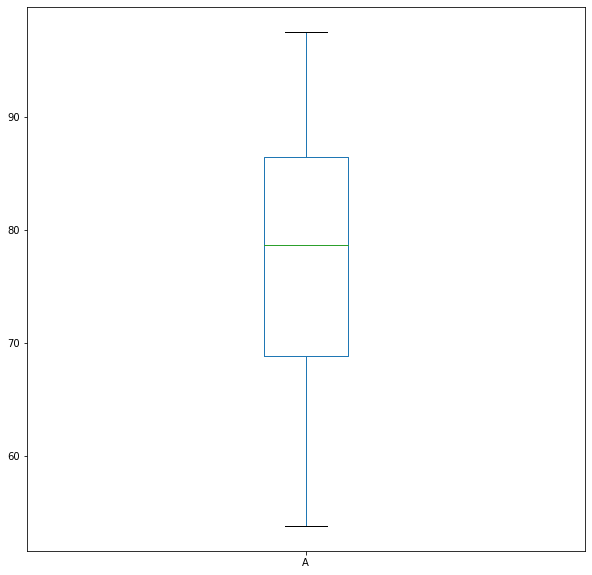

In [64]:
percent_15.boxplot(column = 'A', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6E4253C8>]],
      dtype=object)

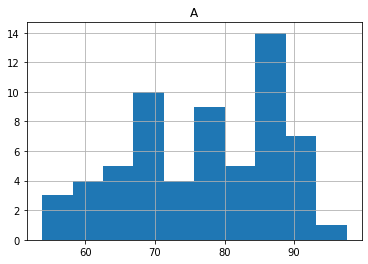

In [65]:
percent_15.hist(column = 'A')

o

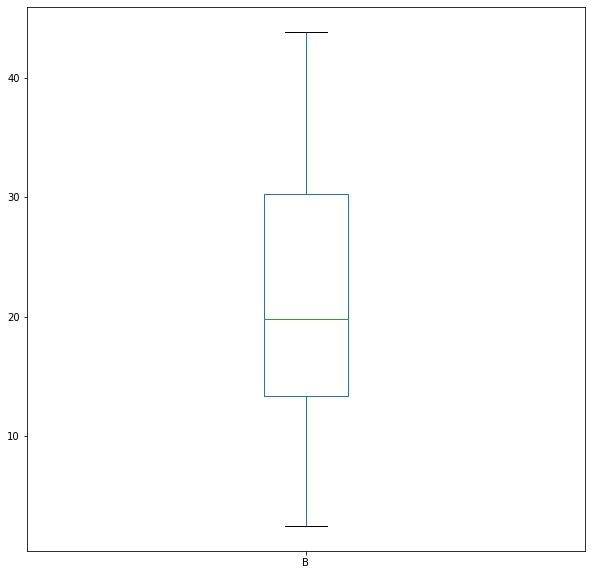

In [66]:
percent_15.boxplot(column = 'B', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6E60DD68>]],
      dtype=object)

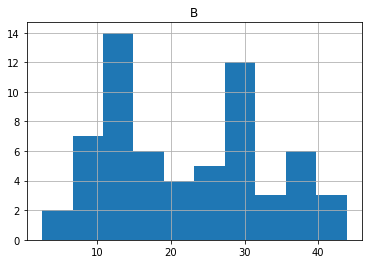

In [67]:
percent_15.hist(column = 'B')

## 2016-2017 Season

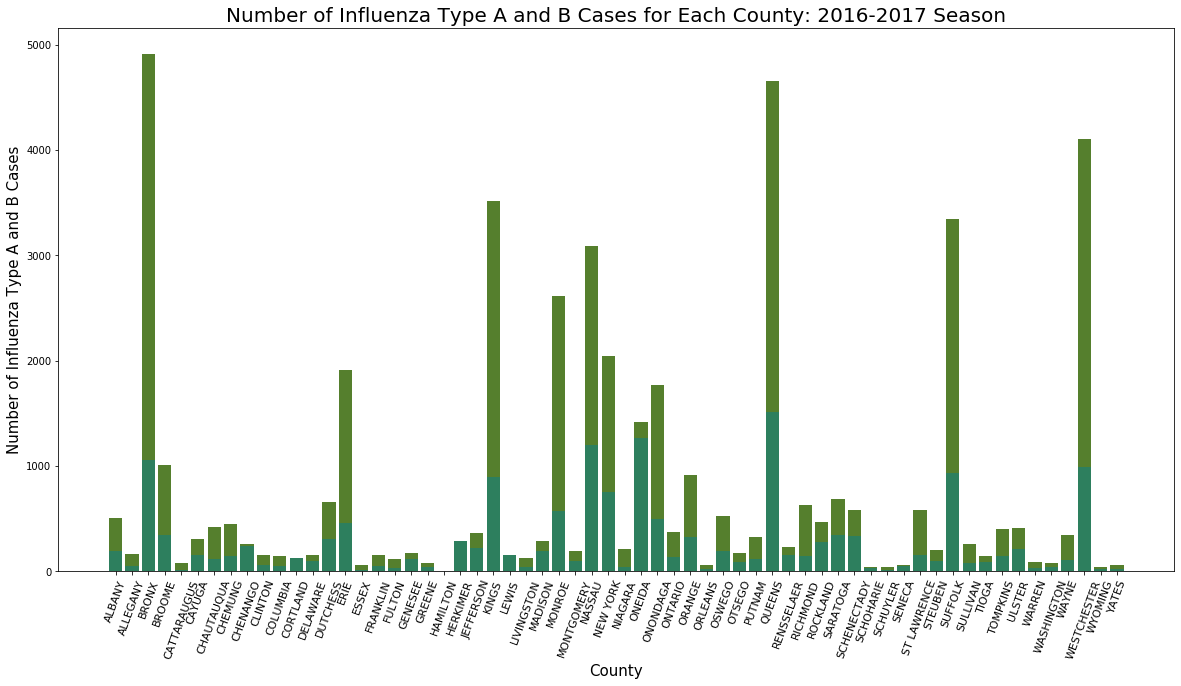

In [68]:
label = flu_16['County']
A = flu_16['Influenza_A']
B = flu_16['Influenza_B']
season = "2016-2017"

plot_stacked_bar_x(flu_16, label, A, B, season)

#### Percentages of Influenza A and B from the 2016-2017 Season

In [69]:
percent_A = calc_percentage_A(flu_16)
percent_B = calc_percentage_B(flu_16)

percent_16 = flu_16['County'].to_frame()
type(percent_16)

percent_16['A'] = percent_A
percent_16['B'] = percent_B

percent_16

,County,A,B
0,ALBANY,71.754636,28.102710
1,ALLEGANY,77.251185,22.748815
2,BRONX,80.593832,17.290026
3,BROOME,74.556213,25.443787
4,CATTARAUGUS,80.000000,16.190476
...,...,...,...
57,WASHINGTON,66.666667,30.894309
58,WAYNE,75.593952,24.190065
59,WESTCHESTER,80.050702,19.403276
60,WYOMING,68.253968,31.746032


In [70]:
percent_16.describe()

,A,B
count,62.000000,62.000000
mean,69.347366,30.132496
std,9.368219,9.539484
min,41.633466,16.190476
25%,63.751751,23.206024
50%,72.086437,27.503912
75%,76.793976,34.883672
max,82.068966,57.768924


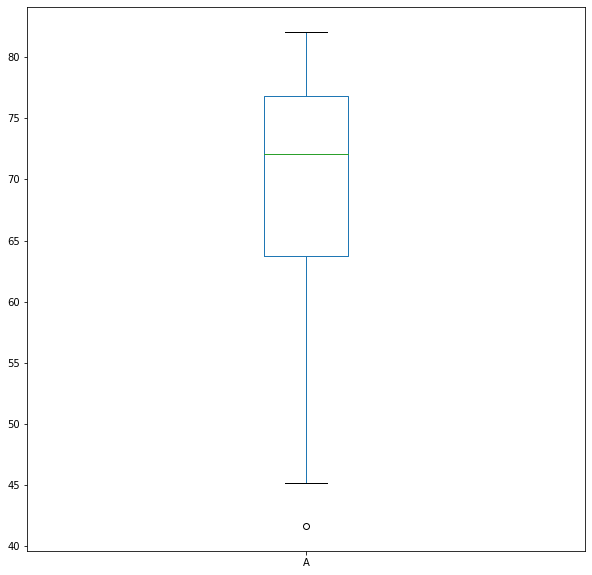

In [71]:
percent_16.boxplot(column = 'A', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6EF1B390>]],
      dtype=object)

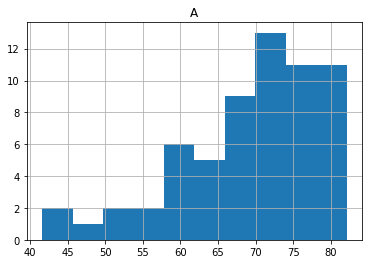

In [72]:
percent_16.hist(column = 'A')

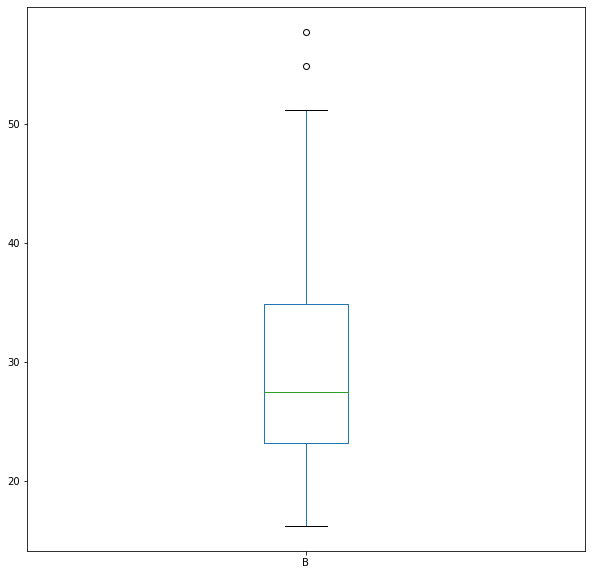

In [73]:
percent_16.boxplot(column = 'B', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6F5B31D0>]],
      dtype=object)

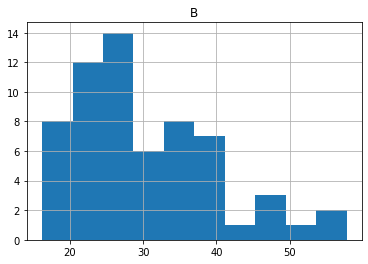

In [74]:
percent_16.hist(column = 'B')

o

## 2017-2018 Season

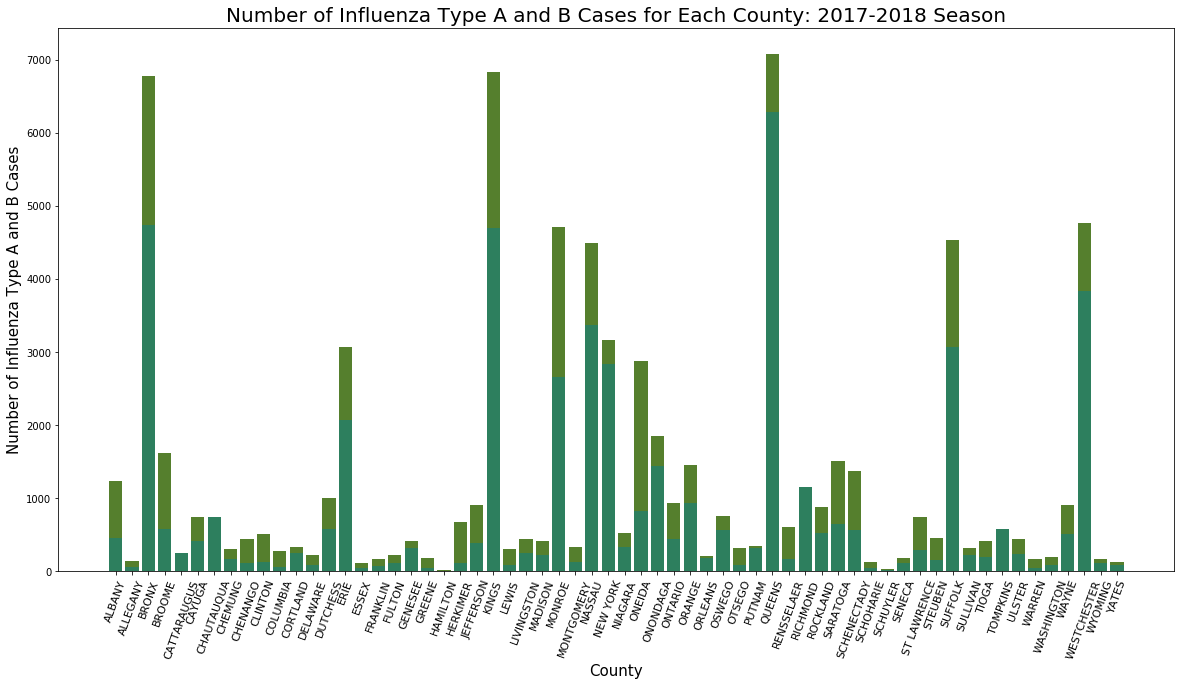

In [75]:
label = flu_17['County']
A = flu_17['Influenza_A']
B = flu_17['Influenza_B']
season = "2017-2018"

plot_stacked_bar_x(flu_17, label, A, B, season)

Influenza B looks like it may be pretty close to A in terms of percent! Still - there are more cases of influenza A than B.

#### Percentages of Influenza A and B from the 2017-2018 Season

In [76]:
percent_A = calc_percentage_A(flu_17)
percent_B = calc_percentage_B(flu_17)

percent_17 = flu_17['County'].to_frame()
type(percent_17)

percent_17['A'] = percent_A
percent_17['B'] = percent_B

percent_17

,County,A,B
0,ALBANY,72.248244,26.697892
1,ALLEGANY,68.780488,28.292683
2,BRONX,57.741084,40.343859
3,BROOME,73.080397,26.377597
4,CATTARAUGUS,47.764228,51.829268
...,...,...,...
57,WASHINGTON,68.705036,30.935252
58,WAYNE,64.118896,35.739561
59,WESTCHESTER,55.179998,44.461164
60,WYOMING,58.802817,41.197183


In [77]:
percent_17.describe()

,A,B
count,62.000000,62.000000
mean,64.969757,34.518738
std,9.515278,9.556454
min,47.531735,14.572864
25%,57.772359,27.195103
50%,64.150279,35.601739
75%,71.822392,41.221538
max,84.924623,52.186178


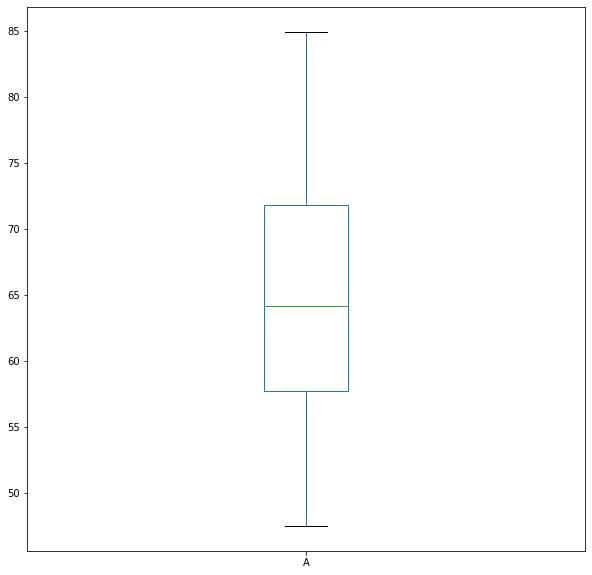

In [78]:
percent_17.boxplot(column = 'A', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6F8D9940>]],
      dtype=object)

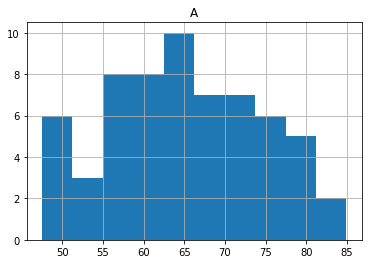

In [79]:
percent_17.hist(column = 'A')

o

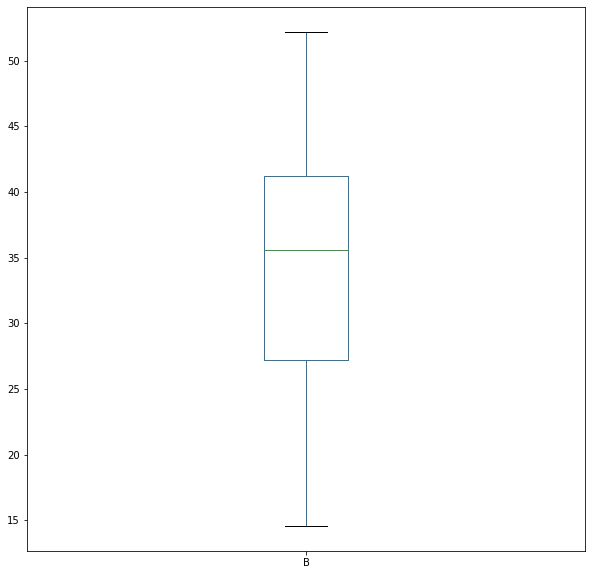

In [80]:
percent_17.boxplot(column = 'B', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E6E57B198>]],
      dtype=object)

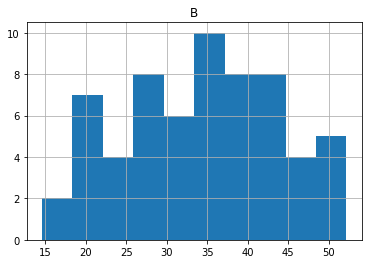

In [81]:
percent_17.hist(column = 'B')

In [82]:
import scipy.stats as stats
from scipy.stats import ttest_ind

In [83]:
A_mean = np.mean(A)
B_mean = np.mean(B)

In [84]:
A_std = np.std(A)
B_std = np.std(B)

Two sampled T-test: Compares the means of two independent groups in order to determine whether there's statistical evidence that the associated population mean is significantly different. These are not independent though, but this is just practice. 

https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

In [85]:
ttest,pval = ttest_ind(A,B)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 0.12398627756608645
we accept null hypothesis


We need a **paired sampled t-test**, it tests for a significant difference between two related variables.

We have the null hypothesis, **H0** = Means difference between the two samples are 0 (aka there is no difference in the means of the samples). We have **H1** = The mean difference between the two samples is not 0.

Helpful links:
https://data-flair.training/blogs/python-statistics/
https://machinelearningmastery.com/statistical-hypothesis-tests/
https://blog.minitab.com/blog/understanding-statistics-and-its-application/what-should-i-do-if-my-data-is-not-normal-v2 <-- explains that ttests are robust enough for data that isn't normally distributed (typically)

In [86]:
ttest, pval = stats.ttest_rel(A,B)
print(pval)

if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

3.5884450749330393e-08
we reject null hypothesis


## 2018-2019 Season

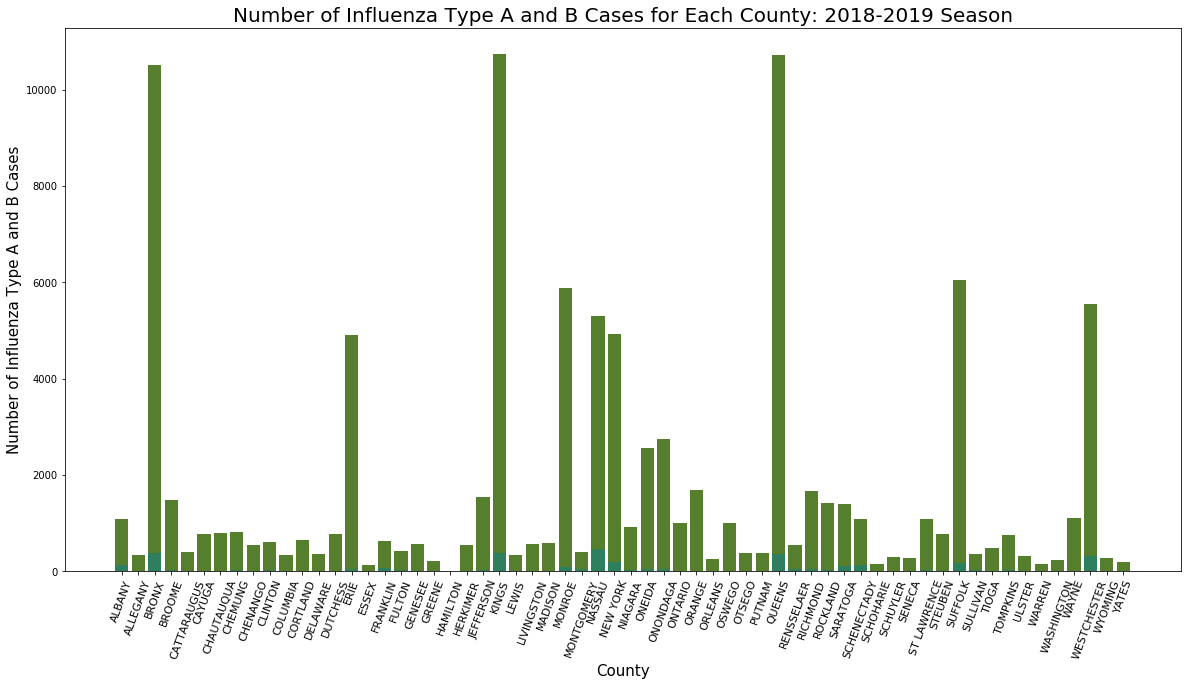

In [87]:
label = flu_18['County']
A = flu_18['Influenza_A']
B = flu_18['Influenza_B']
season = "2018-2019"

plot_stacked_bar_x(flu_18, label, A, B, season)

#### Percentages of Influenza A and B from the 2018-2019 Season

In [88]:
percent_A = calc_percentage_A(flu_18)
percent_B = calc_percentage_B(flu_18)

percent_18 = flu_18['County'].to_frame()
type(percent_18)

percent_18['A'] = percent_A
percent_18['B'] = percent_B

percent_18

,County,A,B
0,ALBANY,80.991124,9.837278
1,ALLEGANY,95.604396,4.120879
2,BRONX,96.349294,3.549807
3,BROOME,98.070526,1.862941
4,CATTARAUGUS,97.094431,2.905569
...,...,...,...
57,WASHINGTON,95.850622,4.149378
58,WAYNE,99.637681,0.362319
59,WESTCHESTER,94.550409,5.347411
60,WYOMING,99.652778,0.347222


In [89]:
percent_18.describe()

,A,B
count,62.000000,62.000000
mean,95.805472,3.128209
std,5.163767,2.605090
min,70.652877,0.000000
25%,95.447152,1.435606
50%,97.543566,2.236111
75%,98.482834,4.142253
max,100.000000,12.195122


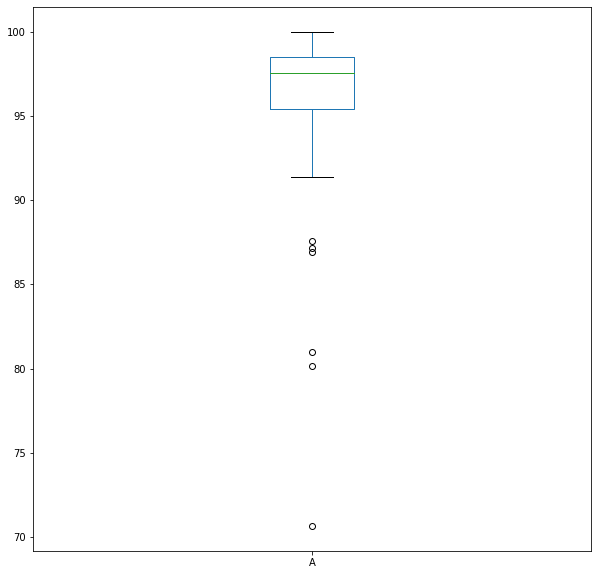

In [90]:
percent_18.boxplot(column = 'A', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E7180AF28>]],
      dtype=object)

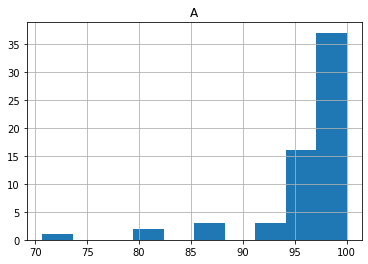

In [91]:
percent_18.hist(column = 'A')

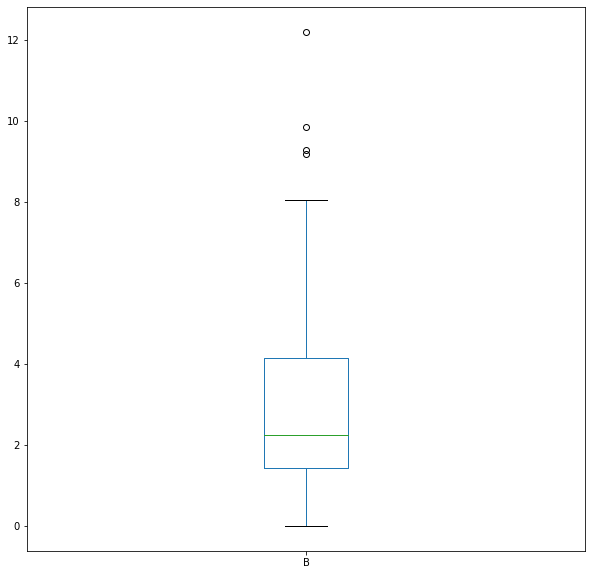

In [92]:
percent_18.boxplot(column = 'B', grid=False, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E717B2668>]],
      dtype=object)

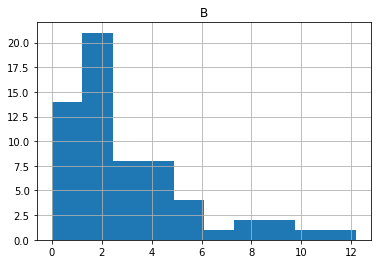

In [93]:
percent_18.hist(column = 'B')